In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust pandas to display comma as thousands separator
pd.options.display.float_format = '{:,}'.format

# item_daily_features.csv

Key fields and potential use:
1. video_id
2. author_id
3. video_type
    - Distinguishes between normal videos and ads. You can filter ads out of recommendations or balance them according to the user’s interaction preferences with both types.
4. upload_dt / date
    - Helps track freshness and recency of content, prioritize newer content or trending videos.
5. video_duration
    - Videos with different durations might appeal to different users
6. video_tag_id / video_tag_name
    - content-based filtering (recommending videos with similar tags).
7. show_cnt, play_cnt, complete_play_cnt
    - popularity filtering. Videos with higher completion rates signal higher user satisfaction.
    - Can calculate some new feature e.g. Complete Play Rate
8. valid_play_cnt (/ valid_play_user_num)
    - More refined measures of engagement that discount partial or irrelevant views, useful for calculating true user interest in a video.
    - Can calculate some new feature e.g. Valid Play Rate   
9. like_cnt, comment_cnt, follow_cnt, share_cnt
    - Reflect explicit feedback and engagement, which is valuable for identifying user preferences.
    - Can be used as features in a ranking model
10. play_progress
    - Higher play_progress indicates higher engagement
11. visible_status
    - Ensures that recommendations only include currently visible (public) videos.

In [2]:
# Data is one level up in the folder structure
rootpath = "../KuaiRec 2.0/"

item_features_filepath = rootpath + "data/item_daily_features.csv"
item_daily_features = pd.read_csv(item_features_filepath)

print(f'Total number of items: {len(item_daily_features)}')

Total number of items: 343341


## Preprocessing

### Filter for public videos only

In [3]:
# Filter only for public videos
item_daily_features_public = item_daily_features[item_daily_features['visible_status'] == 'public']

### Data Type conversion

In [4]:
item_daily_features_public['date'] = pd.to_datetime(item_daily_features_public['date'], format='%Y%m%d')
item_daily_features_public['upload_dt'] = pd.to_datetime(item_daily_features_public['date'], format='%Y-%m-%d')

C:\Users\chong\AppData\Local\Temp\ipykernel_23420\257180170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_daily_features_public['date'] = pd.to_datetime(item_daily_features_public['date'], format='%Y%m%d')
C:\Users\chong\AppData\Local\Temp\ipykernel_23420\257180170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_daily_features_public['upload_dt'] = pd.to_datetime(item_daily_features_public['date'], format='%Y-%m-%d')


### Complete Play Rate

Use play_cnt or valid_play_cnt?

In [5]:
item_daily_features_public['complete_play_rate'] = item_daily_features_public['complete_play_cnt'] / item_daily_features_public['play_cnt']

C:\Users\chong\AppData\Local\Temp\ipykernel_23420\2314212748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_daily_features_public['complete_play_rate'] = item_daily_features_public['complete_play_cnt'] / item_daily_features_public['play_cnt']


### Valid Play Rate

In [6]:
item_daily_features_public['valid_play_rate'] = item_daily_features_public['valid_play_cnt'] / item_daily_features_public['play_cnt']

C:\Users\chong\AppData\Local\Temp\ipykernel_23420\565837255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_daily_features_public['valid_play_rate'] = item_daily_features_public['valid_play_cnt'] / item_daily_features_public['play_cnt']


### Like Rate

In [7]:
item_daily_features_public['like_rate'] = item_daily_features_public['like_cnt'] / item_daily_features_public['play_cnt']

C:\Users\chong\AppData\Local\Temp\ipykernel_23420\2080607225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_daily_features_public['like_rate'] = item_daily_features_public['like_cnt'] / item_daily_features_public['play_cnt']


### Comment Rate

In [8]:
item_daily_features_public['comment_rate'] = item_daily_features_public['comment_cnt'] / item_daily_features_public['play_cnt']

C:\Users\chong\AppData\Local\Temp\ipykernel_23420\3178774581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_daily_features_public['comment_rate'] = item_daily_features_public['comment_cnt'] / item_daily_features_public['play_cnt']


### Follow rate, Share rate

In [9]:
item_daily_features_public['follow_rate'] = item_daily_features_public['follow_cnt'] / item_daily_features_public['play_cnt']
item_daily_features_public['share_rate'] = item_daily_features_public['share_cnt'] / item_daily_features_public['play_cnt']

C:\Users\chong\AppData\Local\Temp\ipykernel_23420\2222581834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_daily_features_public['follow_rate'] = item_daily_features_public['follow_cnt'] / item_daily_features_public['play_cnt']
C:\Users\chong\AppData\Local\Temp\ipykernel_23420\2222581834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_daily_features_public['share_rate'] = item_daily_features_public['share_cnt'] / item_daily_features_public['play_cnt']


Remove outliers for key engagement metrics (Remove top and bottom 1%)

In [19]:
# Remove outliers for key engagement metrics (Remove top and bottom 1%)
engagement_metrics = ['show_cnt', 'play_cnt', 'complete_play_cnt', 'like_cnt', 'comment_cnt', 'follow_cnt', 'share_cnt']

for metric in engagement_metrics:
    lower_bound = item_daily_features_public[metric].quantile(0.01)
    upper_bound = item_daily_features_public[metric].quantile(0.99)
    items_without_outliers = item_daily_features_public[(item_daily_features_public[metric] > lower_bound) & (item_daily_features_public[metric] < upper_bound)]

print("Number of items after removing outliers: ", items_without_outliers.shape[0])

Number of items after removing outliers:  121059


## EDA

### 1. Check for missing values

In [10]:
# Check for missing values and print percentage
missing_values = item_daily_features_public.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
missing_values_percentage = round((missing_values / len(item_daily_features)) * 100, 2)

# Put count and percentage into a dataframe
missing_values_df = pd.DataFrame(missing_values, columns=["Missing Values"])
missing_values_df["Percentage"] = missing_values_percentage
missing_values_df

,Missing Values,Percentage
collect_cnt,69184,20.15
collect_user_num,69184,20.15
cancel_collect_cnt,69184,20.15
cancel_collect_user_num,69184,20.15
video_tag_name,32259,9.4
complete_play_rate,22226,6.47
valid_play_rate,22226,6.47
comment_rate,22226,6.47
follow_rate,22226,6.47
share_rate,22225,6.47


In [29]:
# Seems like no key fields are missing

### 2. Summary Statistics

In [11]:
item_daily_features_public.describe()

,video_id,author_id,video_duration,video_width,video_height,music_id,video_tag_id,show_cnt,show_user_num,play_cnt,...,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num,complete_play_rate,valid_play_rate,like_rate,comment_rate,follow_rate,share_rate
count,"340,782.0","340,782.0","330,261.0","340,782.0","340,782.0","340,782.0","340,782.0","340,782.0","340,782.0","340,782.0",...,"271,598.0","271,598.0","271,598.0","271,598.0","318,556.0","318,556.0","318,560.0","318,556.0","318,556.0","318,557.0"
mean,"5,076.458178542294","4,218.849921650792","12,528.359897172237",712.9392192075873,"1,219.1478569877518","3,039,117,165.15122","1,363.2178841605485","94,931.38506728642","89,244.06677289294","94,873.82672206865",...,20.165365724342596,19.98711330716721,1.3298698812215113,1.3068763392955765,0.40006224170384097,0.48448997934563465,inf,0.0020582100720334113,0.003073696150136279,inf
std,"3,113.464789723784","2,391.046758561001","13,930.335088417754",122.28859738013215,165.42397458165064,"1,544,930,532.9789898","1,090.3527492781136","578,259.1199650074","553,245.6856430914","595,484.2946672393",...,358.0244798758937,355.07675901366116,7.609556238534731,7.391718510701326,0.21880351284001495,0.21627877392400147,NaN,0.027207830840508453,0.012888176057082092,NaN
min,0.0,0.0,40.0,270.0,320.0,0.0,-124.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,"2,319.0","2,122.0","6,933.0",720.0,"1,280.0","2,349,728,900.0",144.0,58.0,50.0,15.0,...,0.0,0.0,0.0,0.0,0.25,0.35353535353535354,0.0,0.0,0.0,0.0
50%,"5,234.0","4,400.0","9,480.0",720.0,"1,280.0","3,920,084,101.0","1,099.0","1,380.0","1,170.0",660.0,...,0.0,0.0,0.0,0.0,0.4087891096487085,0.5050109189107472,0.013091765936970222,0.0,0.000534941519346038,0.0
75%,"7,723.0","6,283.0","12,266.0",720.0,"1,280.0","4,097,717,181.0","2,491.0","24,679.0","22,077.75","21,111.0",...,1.0,1.0,0.0,0.0,0.5484465157322579,0.636449021717071,0.032410566480551226,0.0006561679790026247,0.002570694087403599,0.00015772682903602124
max,"10,727.0","8,369.0","315,040.0","3,024.0","3,024.0","4,431,043,509.0","2,891.0","42,181,538.0","38,935,328.0","41,167,951.0",...,"116,971.0","115,859.0","2,056.0","1,971.0",1.0,1.0,inf,8.5,1.0,inf


### 3. Distribution of key features

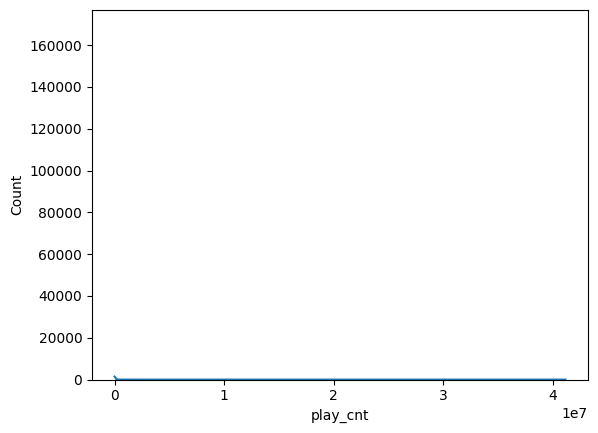

In [20]:
sns.histplot(item_daily_features_public['play_cnt'], kde=True)
plt.show()

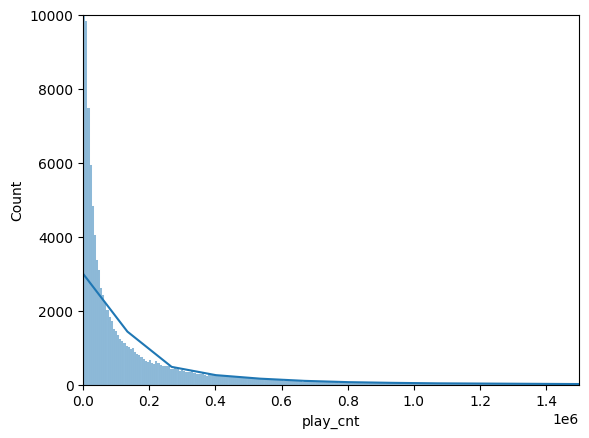

In [29]:
# Removed outliers
sns.histplot(items_without_outliers['play_cnt'], kde=True)
plt.ylim(0, 10000)
plt.xlim(0, 1500000)
plt.show()

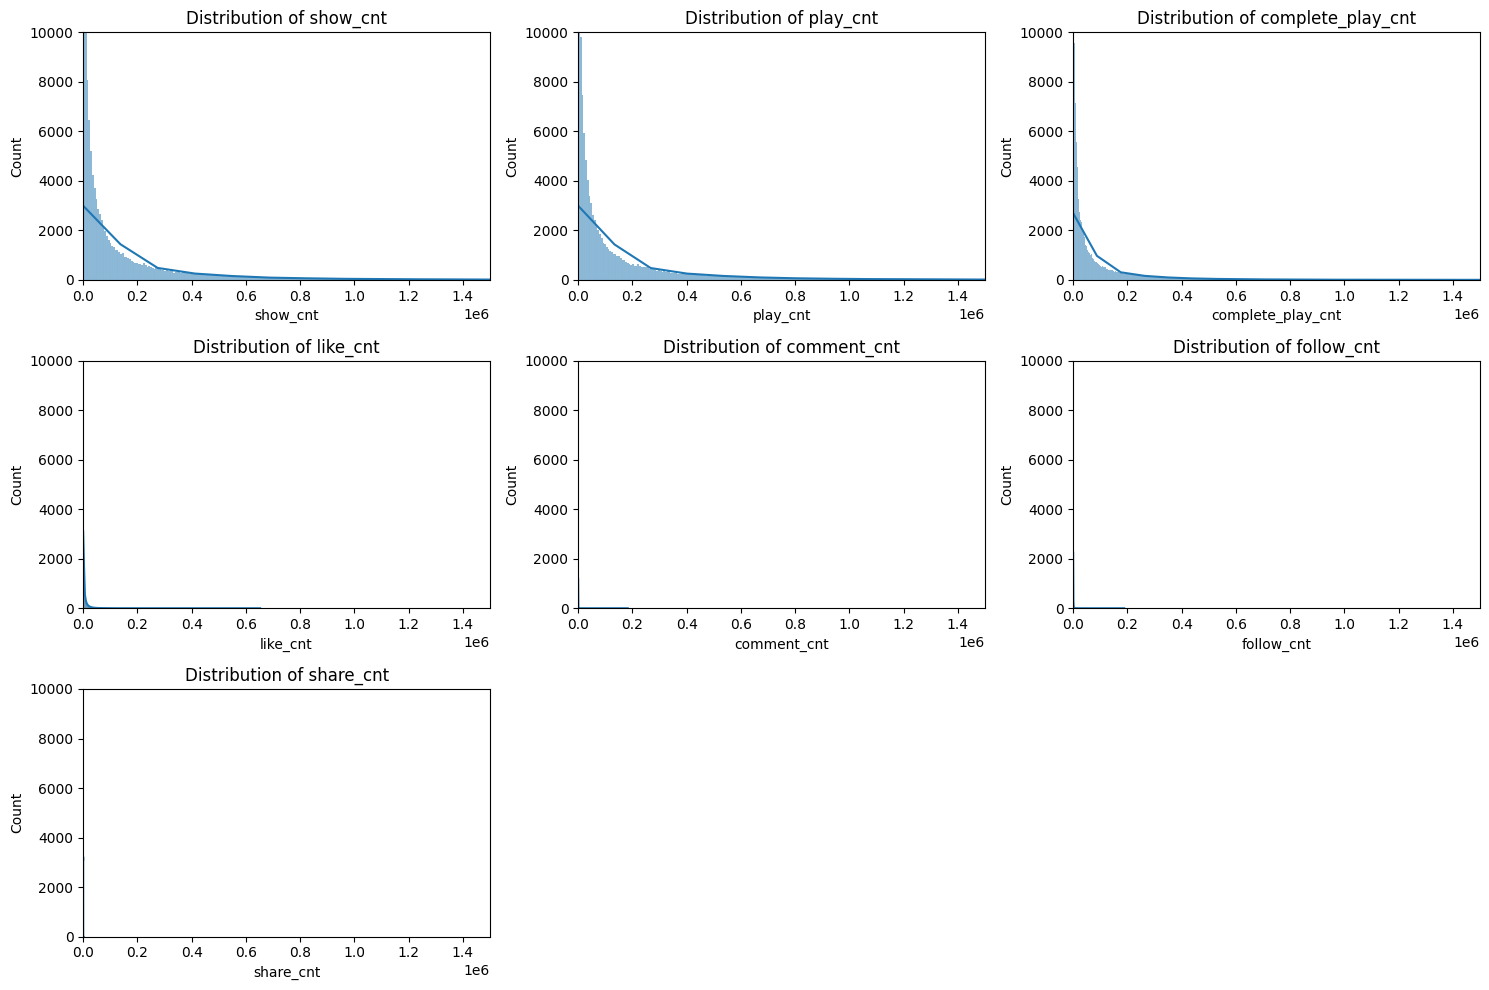

In [34]:
engagement_metrics = ['show_cnt', 'play_cnt', 'complete_play_cnt', 'like_cnt', 'comment_cnt', 'follow_cnt', 'share_cnt']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(engagement_metrics):
    plt.subplot(3, 3, i+1)
    sns.histplot(items_without_outliers[metric], kde=True)
    plt.title(f'Distribution of {metric}')
    plt.ylim(0, 10000)
    plt.xlim(0, 1500000)

plt.tight_layout()
plt.show()

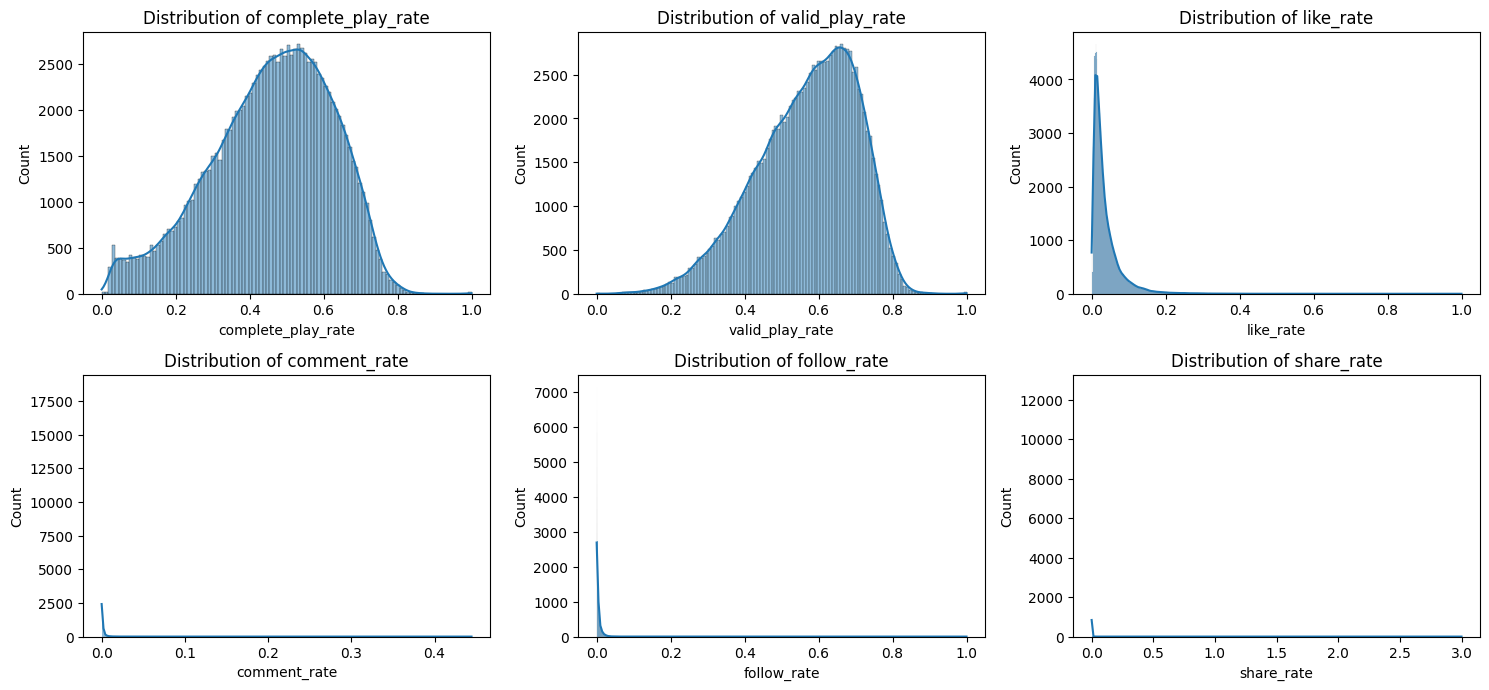

In [35]:
rate_metrics = ['complete_play_rate', 'valid_play_rate', 'like_rate', 'comment_rate', 'follow_rate', 'share_rate']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(rate_metrics):
    plt.subplot(3, 3, i+1)
    sns.histplot(items_without_outliers[metric], kde=True)
    plt.title(f'Distribution of {metric}')

plt.tight_layout()
plt.show()

### 4. Correlation

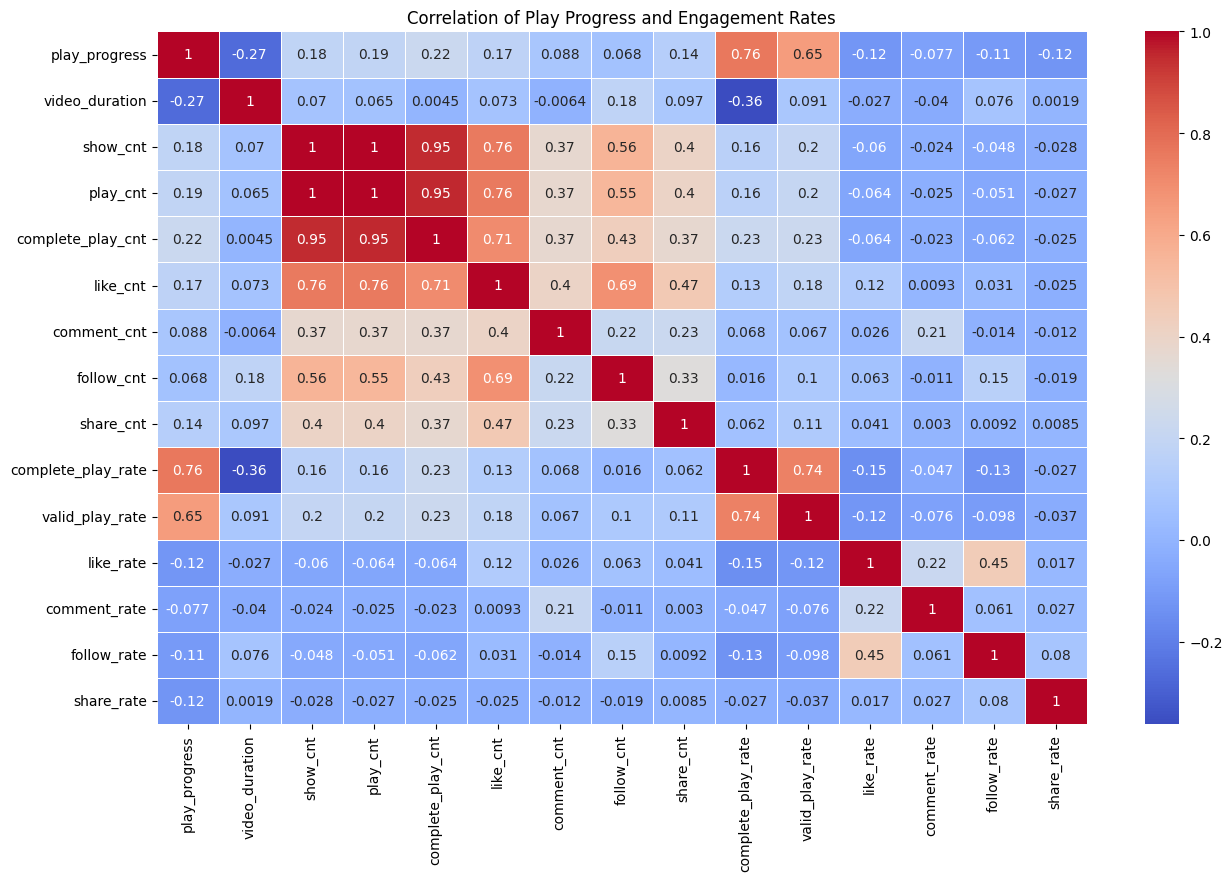

In [46]:
indicator_metrics = ['play_progress', 'video_duration']
correlation_metrics = indicator_metrics + engagement_metrics + rate_metrics 
corr_matrix = items_without_outliers[correlation_metrics].corr()

plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation of Play Progress and Engagement Rates')
plt.show()

In [ ]:
# remove highly correlated features

### 5. Calculated Rates Over Time

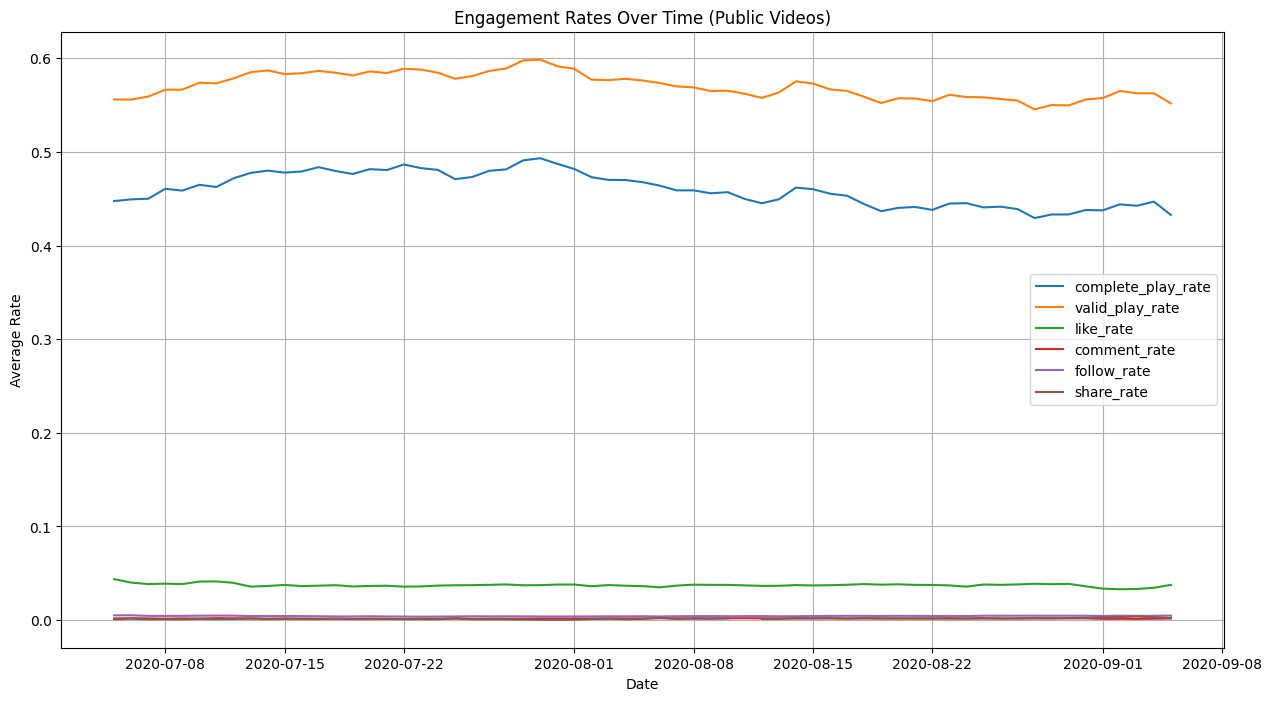

In [47]:
time_series_rates = items_without_outliers.groupby('date')[rate_metrics].mean().reset_index()

plt.figure(figsize=(15, 8))
for rate in rate_metrics:
    plt.plot(time_series_rates['date'], time_series_rates[rate], label=rate)
plt.legend()
plt.title('Engagement Rates Over Time (Public Videos)')
plt.xlabel('Date')
plt.ylabel('Average Rate')
plt.grid(True)
plt.show()

In [ ]:
# Insights


### 6. By Video Type

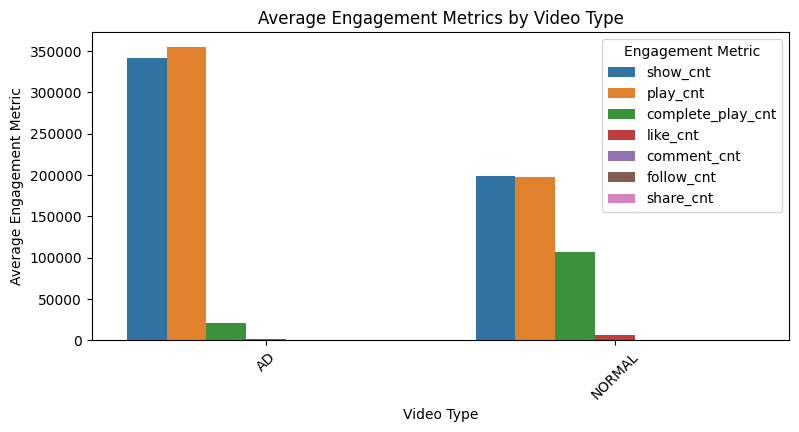

In [55]:
avg_metrics_by_type = items_without_outliers.groupby('video_type')[engagement_metrics].mean().reset_index()
avg_metrics_by_type = avg_metrics_by_type.melt(id_vars='video_type', var_name='metric', value_name='average')

plt.figure(figsize=(9, 4))
sns.barplot(x='video_type', y='average', hue='metric', data=avg_metrics_by_type)
plt.title('Average Engagement Metrics by Video Type')
plt.xlabel('Video Type')
plt.ylabel('Average Engagement Metric')
plt.xticks(rotation=45)
plt.legend(title='Engagement Metric')
plt.show()

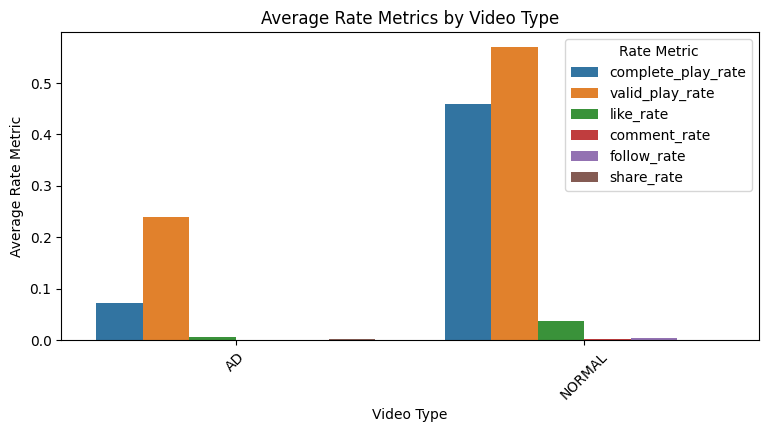

In [58]:
avg_metrics_by_type = items_without_outliers.groupby('video_type')[rate_metrics].mean().reset_index()
avg_metrics_by_type = avg_metrics_by_type.melt(id_vars='video_type', var_name='metric', value_name='average')

plt.figure(figsize=(9, 4))
sns.barplot(x='video_type', y='average', hue='metric', data=avg_metrics_by_type)
plt.title('Average Rate Metrics by Video Type')
plt.xlabel('Video Type')
plt.ylabel('Average Rate Metric')
plt.xticks(rotation=45)
plt.legend(title='Rate Metric')
plt.show()

In [59]:
# Insights
# Ads are better for gaining exposure and views -> higher show count and play count
# However, normal videos have higher engagement rates that represent statisfaction 
#   -> higher complete play cnt/rate, valid play rate, like cnt/rate, comment rate, follow rate
#   -> want to prioritise normal videos
# Idea: split both datasets and recommend ads for exposure and normal videos for engagement in a defined ratio?